# Generate grid of images for comparison with JAG code

5 x 3 grid of original example images produced from image_gen.py script

In [1]:
# Load the Drive helper and mount (Authorization)
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import h5py
import pandas as pd
import numpy as np
from keras import backend as K
import time
import matplotlib.pyplot as plt
os.chdir('/content/drive/My Drive/LLNL/Models')

Using TensorFlow backend.


In [3]:
from keras.models import load_model
K.set_learning_phase(0) # set to 0 for faster DCG output.
dcg_good = load_model('DCG_128.h5') # MSE 2.3930e-04

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
def make_xray_image( shapes, line_of_sight ):
  images = []
  for shape in shapes:
    df_input = pd.DataFrame({'p':[shape], 'theta':[line_of_sight[0]], 'phi':[line_of_sight[1]]})
    x = dcg_good.predict(df_input.iloc[0:1])
    img = np.reshape(x, (100, 100))
    images.append(img)
  return images

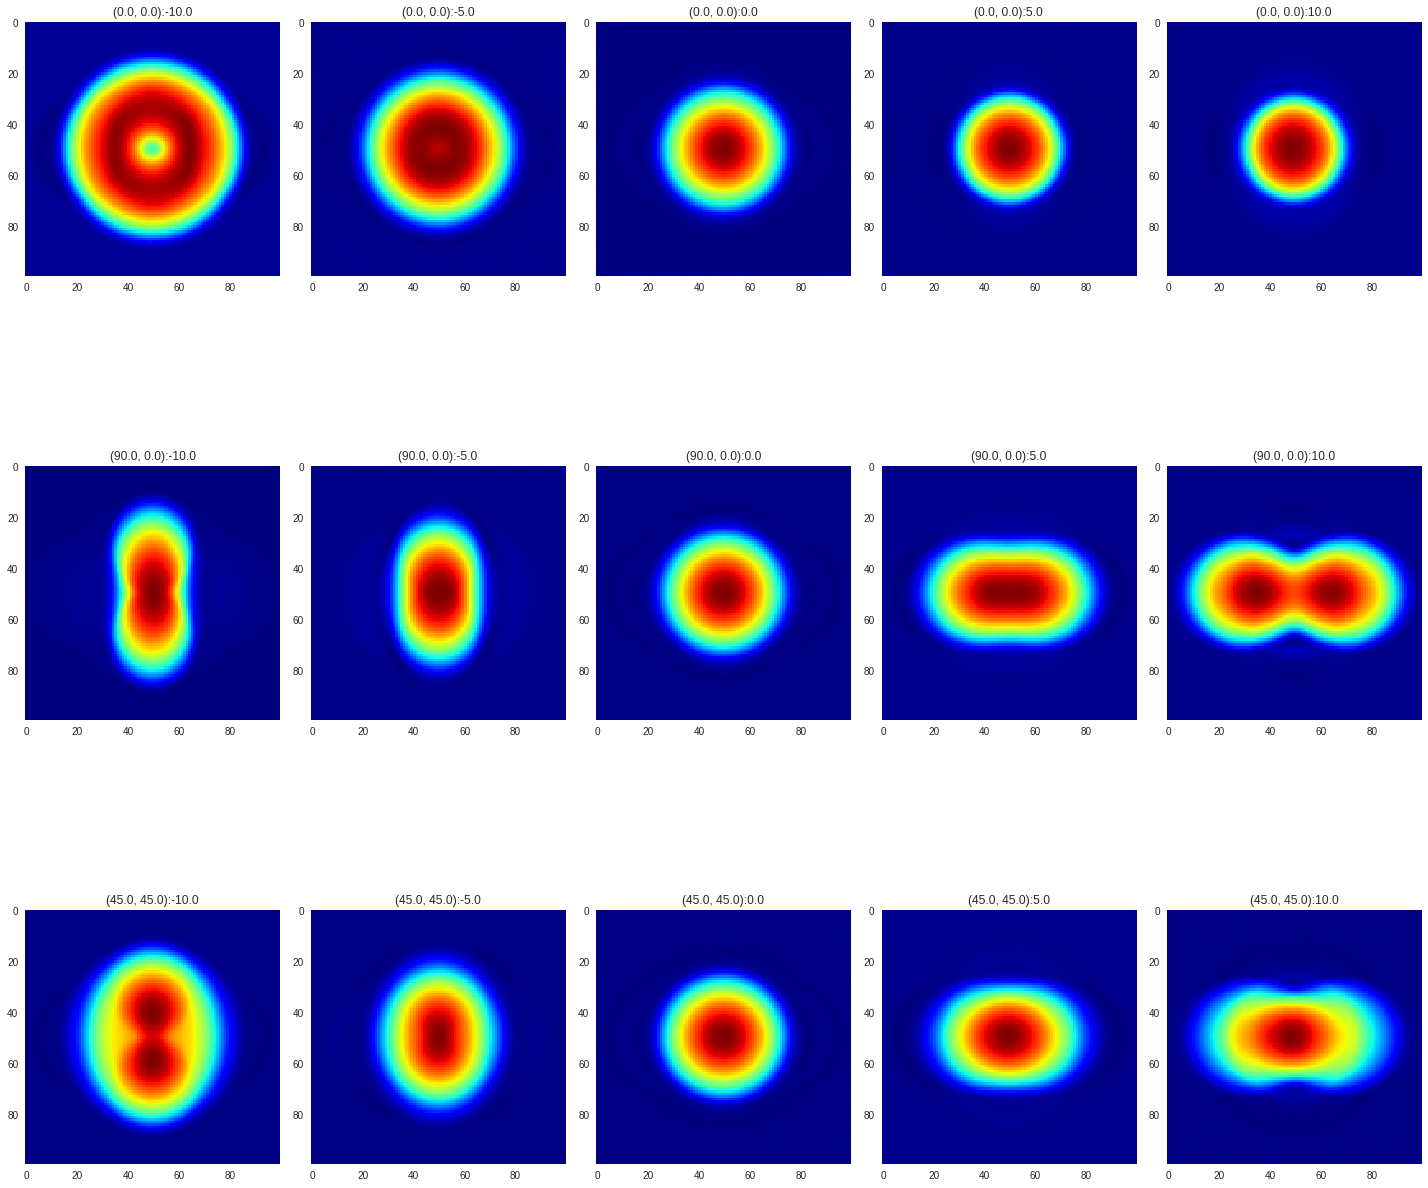

In [9]:
amps = np.linspace(-10,10.,5)

# generate images for a series of lines of site, defined by polar and azimuthal angles (theta,phi)

loss = [ (0.,0.), (90.,0.), (45.,45.) ]

images = [ make_xray_image( amps, los ) for los in loss ]

# plot the results

import matplotlib.pyplot as plt

fig,axs = plt.subplots( nrows=len(loss), ncols=len(amps), figsize=(20,20) )

for los,imags,axss in zip( loss,images, axs ):
    for amp,s,ax in zip(amps,imags,axss):
        ax.imshow(s, cmap = 'jet')
        ax.grid(False) 
        ax.set_title("{}:{}".format(los,amp))

fig.tight_layout()
plt.grid(False)
plt.show()

3.2659192085266113


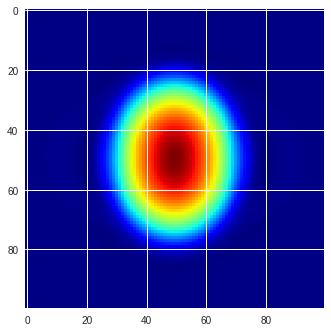

In [0]:
# Time to load 1000 plots (DCG Model)
start = time.time()
for i in range(0,n):
    x = dcg_good.predict(check.iloc[i:i+1])
    plt.imshow(np.reshape(x,(100,100)),cmap = 'jet')

end = time.time()
print(end - start)

In [0]:
K.set_learning_phase(1)

In [0]:
# at uetimes, the keras model does not perform as well!
# DCGenerator outperforms on most unseen samples!
# Try the combination of p, phi, theta above!!